# Take Home Test Food Delivery Prediction

created by Yuono Dwi Raharjo

 [Kaggle Source Anxiety Dataset](https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction)

# About Project

## 🧭 Introduction

Food delivery has become an essential service in the modern digital era, especially with the rise of on-demand platforms and shifting consumer lifestyles. As convenience and timeliness become key expectations, the ability to accurately predict delivery time is not only crucial for customer satisfaction but also for operational efficiency in logistics and supply chain management (Sun et al., 2021).

One of the persistent challenges in this domain is the variability in delivery time caused by numerous factors such as distance, weather, traffic, and time of day. These unpredictable elements can impact not only the speed of service but also increase operational costs, leading to inefficiencies in route planning and resource allocation. With the availability of rich datasets and the advancement of data science tools, organizations now have the opportunity to harness historical delivery data to build predictive systems that are scalable, data-driven, and adaptable to real-world uncertainties.

## 📚 Backgrounds


The logistics and food delivery industry has seen rapid technological integration over the past decade, driven by customer expectations, competitive markets, and the proliferation of delivery platforms. According to Statista (2024), the global online food delivery market is expected to surpass USD 1.2 trillion by 2029, making the optimization of delivery logistics an increasingly important issue.

Various studies have highlighted the impact of external and operational variables on delivery performance. For example, weather conditions have been shown to significantly affect delivery time due to reduced visibility and road hazards. Similarly, urban traffic congestion contributes to delays and variability in estimated delivery times, particularly during peak hours (Sun et al., 2021). Furthermore, operational attributes such as courier experience and preparation time are internal process factors that can be optimized to improve performance.

By combining these diverse variables into a unified data structure, predictive modeling can offer insights that benefit not only businesses but also end-users by increasing transparency and setting realistic expectations. This opens new possibilities for machine learning applications in last-mile delivery systems and real-time decision support tools.

## 🎯 Project and Business Objectives 

This project aims to develop a robust, data-driven framework for analyzing and predicting food delivery times using a real-world dataset. The project objectives are divided into two main scopes: Exploratory Data Analysis (EDA) and Machine Learning (ML) Modeling.

### 🔍 A. EDA (Data Analysis) Objectives

1. Analyze key contextual factors influencing delivery time

2. Evaluate courier-related attributes, such as years of experience and mode of transportation, to assess their impact on delivery efficiency.

3. Identify temporal patterns by examining delivery distribution across different times of day, trafic level, weather, and analyzing preparation time duration.

4. Explore the relationship between distance and delivery time to uncover operational thresholds or delays associated with longer routes.

5. Provide a summary of overall delivery performance, including average delivery time, distance, and food preparation time.

6. Enable interactive data exploration through dashboard filters (e.g., traffic, weather, courier experience) to support tailored business insights.



### 🤖 B. Machine Learning Modeling Objectives


1. Build predictive models using supervised learning techniques (e.g., regression, ensemble models) to estimate delivery time based on known variables.

2. Compare and evaluate different ML algorithms to select the most accurate and interpretable model.

3. Support data-driven decision making by identifying the most influential features affecting delivery time, enabling businesses to optimize operations accordingly.

4. Deploy a simulation-ready prediction system that could be integrated into streamlit for real-time estimation or route optimization.



By achieving these objectives, the project contributes not only to academic exploration but also to practical applications in smart logistics, enhancing efficiency, reliability, and user satisfaction in the food delivery sector.

### 📖 References

* Statista. (2024). Online food delivery – Worldwide. Retrieved from https://www.statista.com/outlook/dmo/eservices/online-food-delivery/worldwide

* Sun, L., Zhang, H., & Lu, Y. (2021). Urban traffic congestion and its influence on delivery performance: A data-driven approach. Transportation Research Part C: Emerging Technologies, 130, 103293. https://doi.org/10.1016/j.trc.2021.103293

# Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


# Data Understanding

## About Dataset

This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.

Key Features:

1. Order_ID: Unique identifier for each order.

2. Distance_km: The delivery distance in kilometers.

3. Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

4. Traffic_Level: Traffic conditions categorized as Low, Medium, or High.

5. Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

6. Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.

7. Preparation_Time_min: The time required to prepare the order, measured in minutes.

8. Courier_Experience_yrs: Experience of the courier in years.

9. Delivery_Time_min: The total delivery time in minutes (target variable).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


Indicate missing vallue in 4 column

# Data Cleaning

## Duplicate Handling

In [5]:
# Check for duplicates
len(df.drop_duplicates())/len(df)

1.0

The duplicate value shows 1 indicating there is no duplicate data.

## Missing Vallue Handling

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

There are four columns with 30 missing values each (less than 20%), namely: Weather, Traffic_Level, and Time_of_Day, which are categorical variables, and Courier_Experience_yrs, which is a numerical variable.

Therefore, missing values will be handled by imputing categorical columns with the mode and the numerical column with the median.

In [7]:
# show mode for categorical columns and fill missing values with mode
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day']
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    print(f"Modus column {col}: {mode_val}")
    df[col].fillna(mode_val, inplace=True)

# show median for numerical columns and fill missing values with median
numerical_cols = ['Courier_Experience_yrs']
for col in numerical_cols:
    median_val = df[col].median()
    print(f"Median column {col}: {median_val}")
    df[col].fillna(median_val, inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputatition:\n", df.isnull().sum())

Modus column Weather: Clear
Modus column Traffic_Level: Medium
Modus column Time_of_Day: Morning
Median column Courier_Experience_yrs: 5.0

Missing values after imputatition:
 Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5000\2183528975.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5000\2183528975.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [8]:
# Check information about the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [9]:
# save a copy of the cleaned dataset for future use (example, for dashboarding)
df.to_csv('Food_Delivery_Times_Cleaned.csv', index=False)

📌 Key Insights 
* Total Records Final: Dataset contains 1,000 entries with no missing values (after handling) across all 9 columns.

* Data Types:

1. Numerical columns (5): Order_ID, Distance_km, Preparation_Time_min, Courier_Experience_yrs, Delivery_Time_min

2. Categorical columns (4): Weather, Traffic_Level, Time_of_Day, Vehicle_Type

3. Target Variable: Delivery_Time_min is fully populated and ready for supervised learning tasks.

## Describe and Outlier Handling

In [10]:
# Describe the dataset
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.592000,56.732000
std,288.819436,5.696656,7.204553,2.871198,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


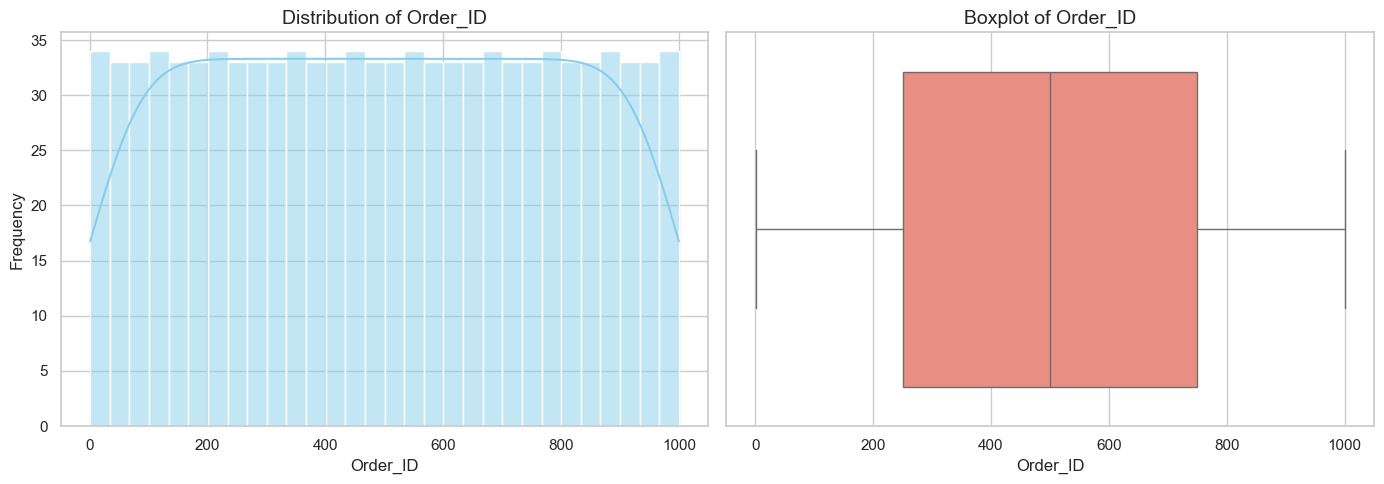

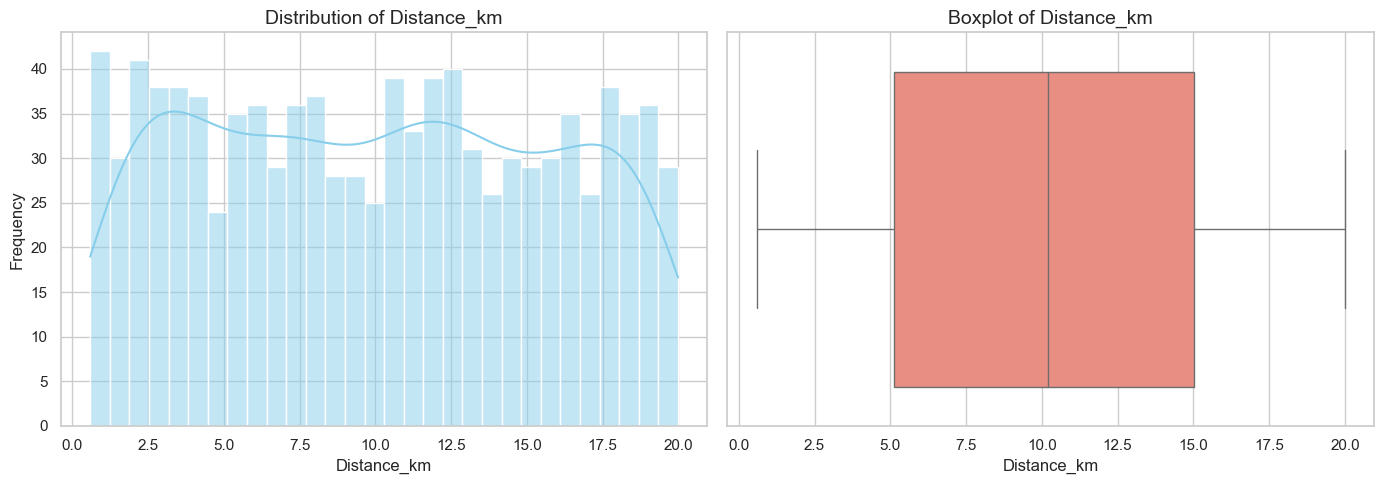

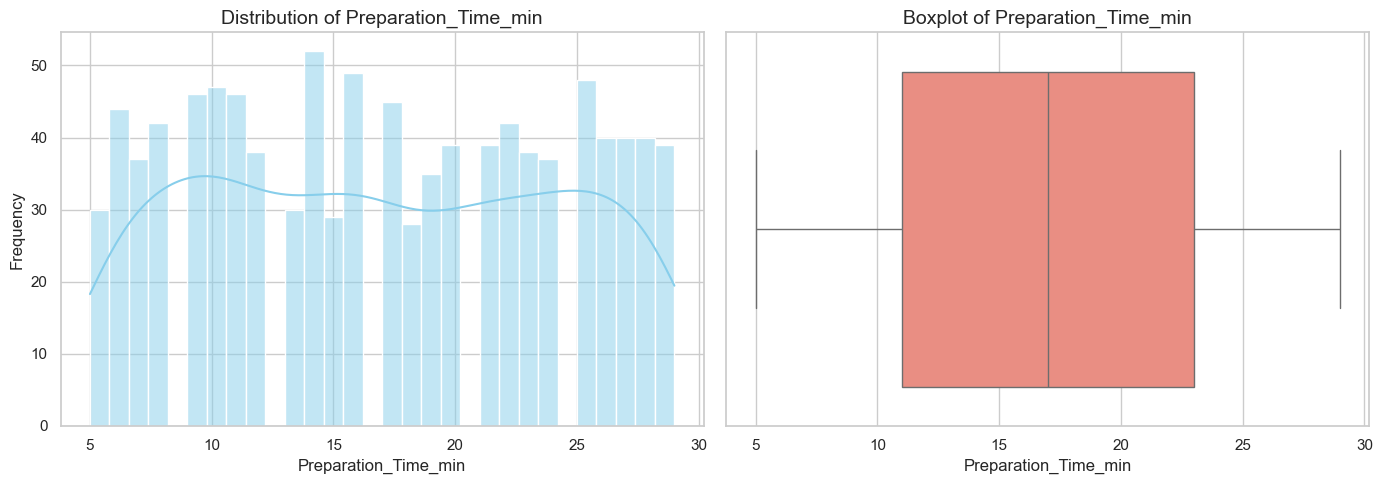

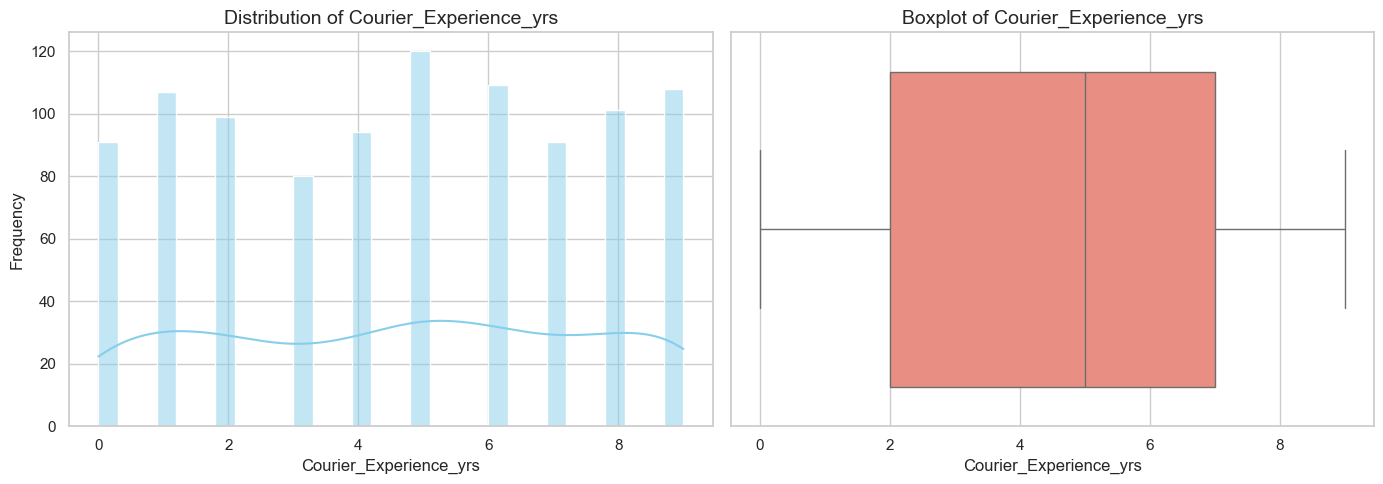

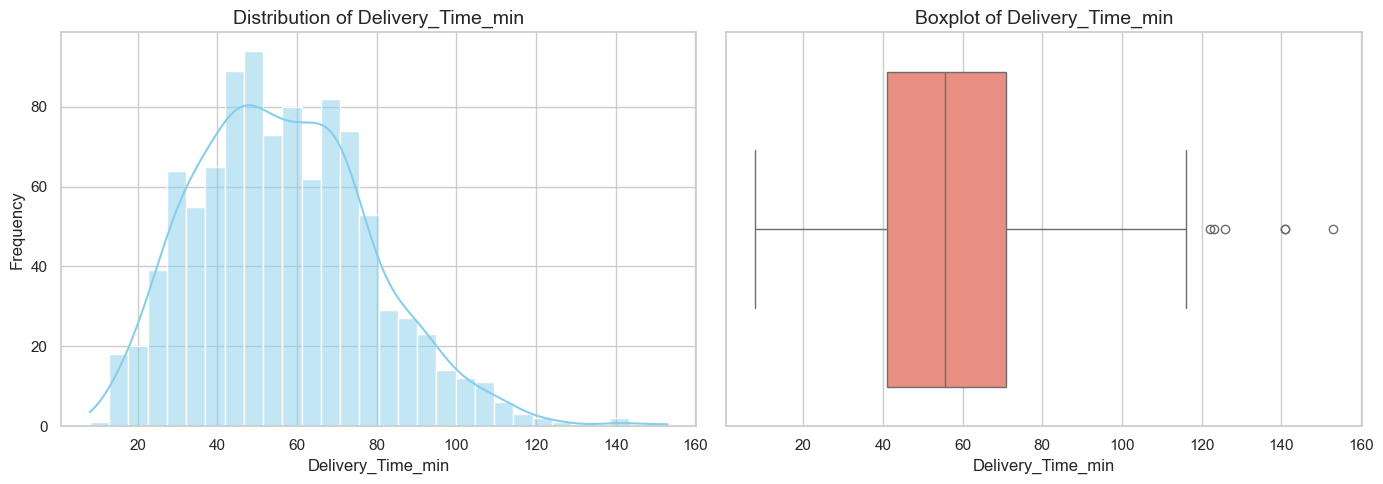

In [11]:
## Distribution and Outlier Handling

# Set plotting style
sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for col in numeric_cols:
    plt.figure(figsize=(14, 5))

    # Histogram (Distribution)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot (Outlier detection)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

📌 Key Insights from Numerical Summary

1. Numerical Diversity: All numerical columns (Distance_km, Preparation_Time_min, Courier_Experience_yrs, and Delivery_Time_min) exhibit varied distributions.

2. Target Variable – Delivery Time:

    * Mean: 56.7 minutes, Median: 55.5 minutes → relatively balanced central tendency.

    * Slight right-skewed distribution, confirmed by histogram and box plot.

    * A few mild outliers observed, but no extreme values; all retained for modeling, given the importance of Delivery_Time_min as the target.

3. No Severe Outliers:

    * Box plots show all features are well-distributed with compact interquartile ranges.

    * Small number of mild outliers (mainly in delivery time), but nothing justifies removal.



# EDA

## 1. Analyze key contextual factors influencing delivery time


### Distributions Features Column Category

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5000\479182704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


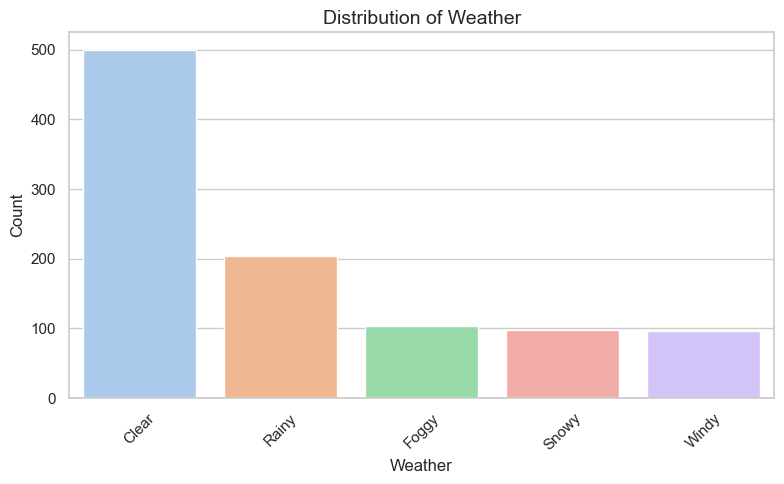

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5000\479182704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


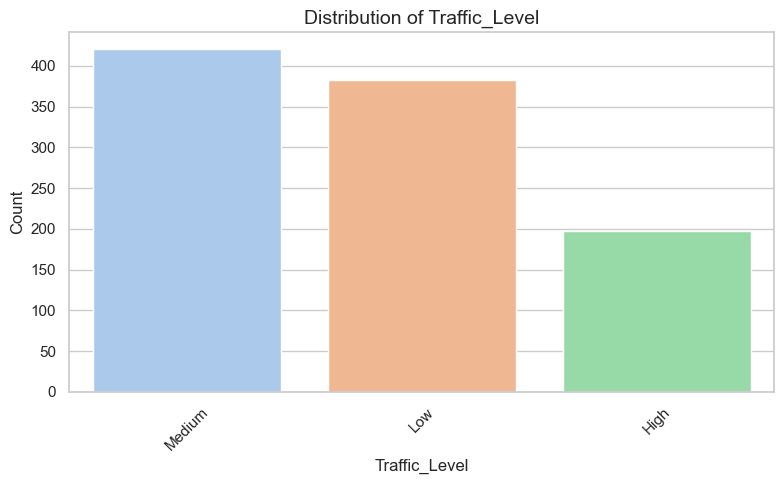

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5000\479182704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


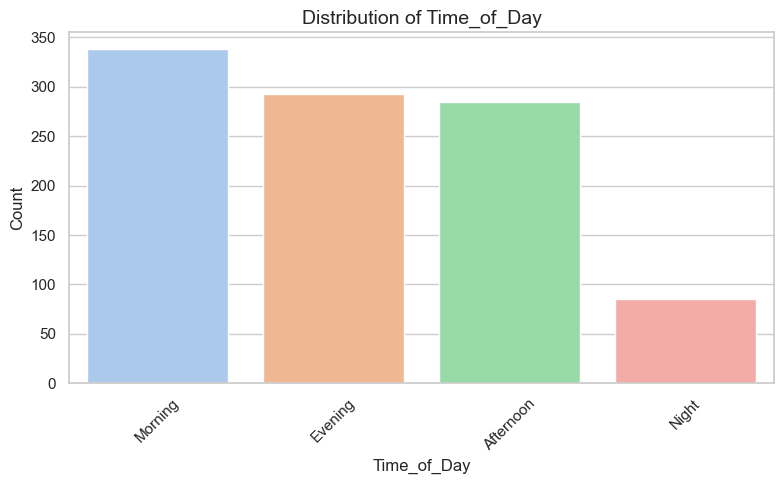

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5000\479182704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


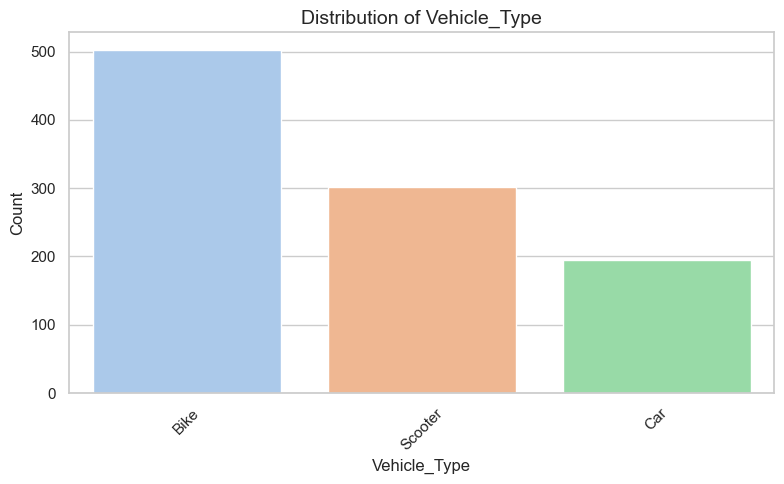

In [12]:
# columns with categorical data
categorical_cols = df.select_dtypes(include='object').columns

# Loop through each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Anova for Categorical Column

In [13]:
import scipy.stats as stats
import pandas as pd

# Pastikan target bertipe numerik
df["Delivery_Time_min"] = pd.to_numeric(df["Delivery_Time_min"], errors='coerce')

# Kolom kategorikal dari info
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Loop untuk semua kolom kategorikal
for cat_col in categorical_cols:
    print(f"\n{'='*50}\n🔍 Shapiro-Wilk Normality Test per group: {cat_col}\n{'='*50}")
    
    group_data = df.groupby(cat_col)["Delivery_Time_min"]
    normal_flag = True
    valid_groups = []
    
    for name, group in group_data:
        if len(group) >= 3:
            stat, p = stats.shapiro(group)
            print(f"- {name}: W={stat:.4f}, p={p:.4f}")
            if p < 0.05:
                normal_flag = False
            valid_groups.append(group)
        else:
            print(f"- {name}: skipped (less than 3 samples)")
    
    print(f"\n📊 {cat_col} ANOVA/Kruskal-Wallis Result:")
    if len(valid_groups) < 2:
        print("❌ Tidak cukup grup untuk uji statistik.")
    elif normal_flag:
        f_stat, p_val = stats.f_oneway(*valid_groups)
        print(f"ANOVA → F = {f_stat:.4f}, p = {p_val:.4f}")
    else:
        h_stat, p_val = stats.kruskal(*valid_groups)
        print(f"Kruskal-Wallis → H = {h_stat:.4f}, p = {p_val:.4f}")



🔍 Shapiro-Wilk Normality Test per group: Weather
- Clear: W=0.9771, p=0.0000
- Foggy: W=0.9717, p=0.0262
- Rainy: W=0.9672, p=0.0001
- Snowy: W=0.9800, p=0.1468
- Windy: W=0.9786, p=0.1191

📊 Weather ANOVA/Kruskal-Wallis Result:
Kruskal-Wallis → H = 37.0454, p = 0.0000

🔍 Shapiro-Wilk Normality Test per group: Traffic_Level
- High: W=0.9841, p=0.0257
- Low: W=0.9722, p=0.0000
- Medium: W=0.9799, p=0.0000

📊 Traffic_Level ANOVA/Kruskal-Wallis Result:
Kruskal-Wallis → H = 37.0658, p = 0.0000

🔍 Shapiro-Wilk Normality Test per group: Time_of_Day
- Afternoon: W=0.9793, p=0.0004
- Evening: W=0.9762, p=0.0001
- Morning: W=0.9788, p=0.0001
- Night: W=0.9552, p=0.0049

📊 Time_of_Day ANOVA/Kruskal-Wallis Result:
Kruskal-Wallis → H = 0.9383, p = 0.8162

🔍 Shapiro-Wilk Normality Test per group: Vehicle_Type
- Bike: W=0.9852, p=0.0001
- Car: W=0.9767, p=0.0025
- Scooter: W=0.9756, p=0.0001

📊 Vehicle_Type ANOVA/Kruskal-Wallis Result:
Kruskal-Wallis → H = 0.9852, p = 0.6110


### Multicol Check (VIF)

In [14]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# PNumeric columns for VIF calculation
df_num = df.select_dtypes(include=['float64', 'int64'])

# VIF constant
x_vif = add_constant(df_num)

# Vif calculation
vif_df = pd.DataFrame()
vif_df["Feature"] = x_vif.columns
vif_df["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

# Display VIF results
vif_df[vif_df["Feature"] != "const"]

,Feature,VIF
1,Order_ID,1.002091
2,Distance_km,3.147058
3,Preparation_Time_min,1.342855
4,Courier_Experience_yrs,1.020060
5,Delivery_Time_min,3.499671


### Correlation Matriks

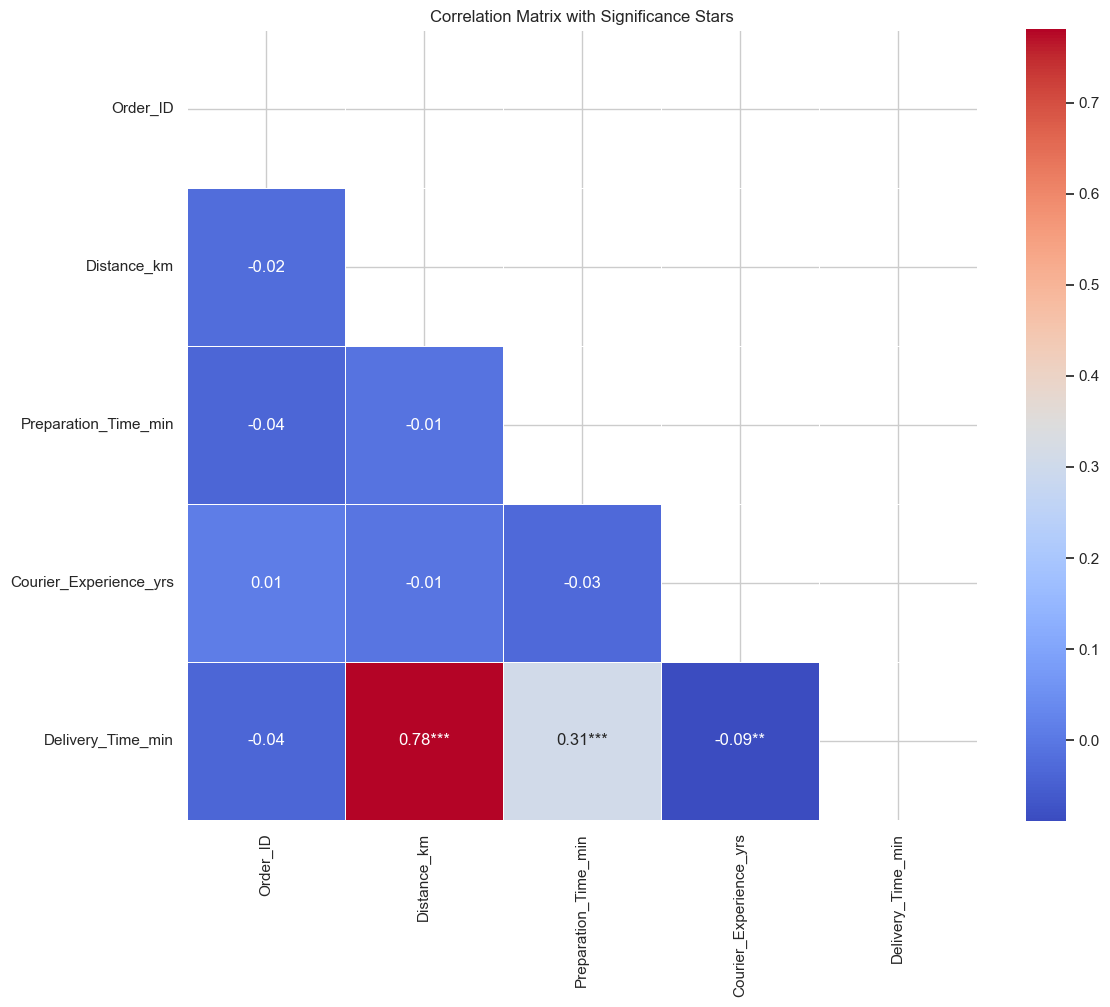

In [15]:
from scipy.stats import pearsonr


# Select only numerical columns
df_num = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix and p-values
cor_matrix = df_num.corr()
pval_matrix = pd.DataFrame(np.ones_like(cor_matrix), columns=cor_matrix.columns, index=cor_matrix.index)

# Fill the p-value matrix with real values using Pearson correlation
for col in cor_matrix.columns:
    for row in cor_matrix.index:
        if row != col:
            _, pval = pearsonr(df_num[row], df_num[col])
            pval_matrix.loc[row, col] = pval

# Format the correlation matrix with significance stars
annot_matrix = cor_matrix.copy().astype(str)
for r in cor_matrix.index:
    for c in cor_matrix.columns:
        if r != c:
            p = pval_matrix.loc[r, c]
            star = ""
            if p < 0.001:
                star = "***"
            elif p < 0.01:
                star = "**"
            elif p < 0.05:
                star = "*"
            annot_matrix.loc[r, c] = f"{cor_matrix.loc[r, c]:.2f}{star}"
        else:
            annot_matrix.loc[r, c] = ""  # leave diagonal empty for cleaner display

# Create a mask to hide the upper triangle of the matrix
mask = np.triu(np.ones_like(cor_matrix, dtype=bool))

# Plot the heatmap with annotations and significance stars
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, mask=mask, annot=annot_matrix, fmt='', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix with Significance Stars")
plt.tight_layout()
plt.show()



### 🎯 Insight for Objective 1: Analyze key contextual factors influencing delivery time


📌 Key Insight:

1. Distance\_km has a strong positive correlation with Delivery\_Time\_min (r = 0.78, p < 0.001), indicating that longer distances significantly increase delivery time.

2. Preparation\_Time\_min shows a moderate positive correlation (r = 0.31, p < 0.001), suggesting that food preparation duration also contributes meaningfully to total delivery time.

3. Courier\_Experience\_yrs has a weak negative correlation with delivery time (r = -0.09, p < 0.01), implying that more experienced couriers may complete deliveries slightly faster.


💡 Recommendation:

* Focus optimization strategies on managing deliveries across longer distances, as this is the most influential factor.

* Consider parallelizing food preparation with courier dispatch for shorter total wait time.

* Experience-based courier assignment may yield minor gains in delivery efficiency, especially during peak hours.



## 2. Evaluate courier-related attributes, such as years of experience and mode of transportation, to assess their impact on delivery efficiency.

### 1. Delivery Time by Vehicle Type

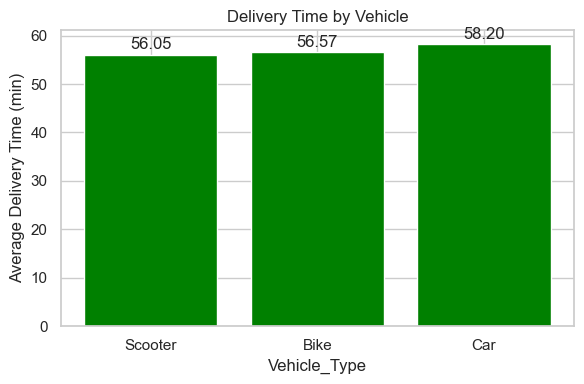

In [39]:
# 1. Bar Chart: Delivery Time by Vehicle Type
plt.figure(figsize=(6, 4))
vehicle_avg = df.groupby('Vehicle_Type')['Delivery_Time_min'].mean().sort_values()

bars = plt.bar(vehicle_avg.index, vehicle_avg.values, color='green')
plt.title("Delivery Time by Vehicle")
plt.xlabel("Vehicle_Type")
plt.ylabel("Average Delivery Time (min)")

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()




### 2. Delivery Time by Courier Experience

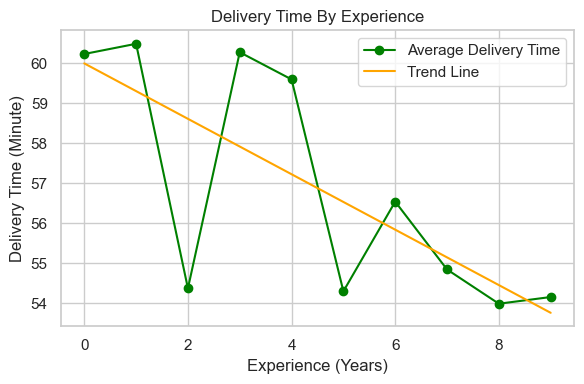

In [41]:
# 2. Line Plot with Trendline: Delivery Time by Courier Experience
from sklearn.linear_model import LinearRegression


experience_avg = df.groupby('Courier_Experience_yrs')['Delivery_Time_min'].mean().reset_index()

X = experience_avg[['Courier_Experience_yrs']]
y = experience_avg['Delivery_Time_min']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(6, 4))
plt.plot(experience_avg['Courier_Experience_yrs'], experience_avg['Delivery_Time_min'], marker='o', color='green', label='Average Delivery Time')
plt.plot(experience_avg['Courier_Experience_yrs'], y_pred, color='orange', label='Trend Line')

plt.title("Delivery Time By Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Delivery Time (Minute)")
plt.legend()
plt.tight_layout()
plt.show()


### 🎯 Insight for Objective 2:  Evaluate courier-related attributes, such as years of experience and mode of transportation, to assess their impact on delivery efficiency.



📌 Key Insights:

1. Delivery Time by Vehicle Type
 The average delivery time varies slightly across different vehicle types. Deliveries completed using cars exhibit the highest average duration (58.20 minutes), followed by bikes (56.57 minutes), while scooters demonstrate the lowest delivery time (56.05 minutes). Although the differences are relatively small, the data indicates that lighter vehicles may offer marginally faster delivery performance in urban settings.

2. Delivery Time by Courier Experience
 There is a clear downward trend between courier experience and delivery duration. Couriers with less than 2 years of experience tend to deliver in over 60 minutes, while those with 8–9 years of experience consistently perform deliveries in under 54 minutes. This negative linear trend suggests that experience contributes to improved delivery efficiency, despite some fluctuations across individual experience levels.

💡 Recommendations:

* Optimize vehicle assignment based on delivery context. Scooters and bikes may be prioritized for short-distance or high-density urban routes, while cars can be reserved for long-distance or adverse weather conditions.

* Integrate courier experience into route assignment algorithms. More experienced couriers may be allocated to time-sensitive or complex deliveries to enhance punctuality.

* Implement structured training and onboarding programs to accelerate the learning curve for less experienced couriers and reduce performance disparities over time.


## 3. Identify temporal patterns by examining delivery distribution across different times of day, trafic level, weather, and analyzing preparation time duration.

### 1. Line Plot: Delivery Time by Preparation Time (with trendline)

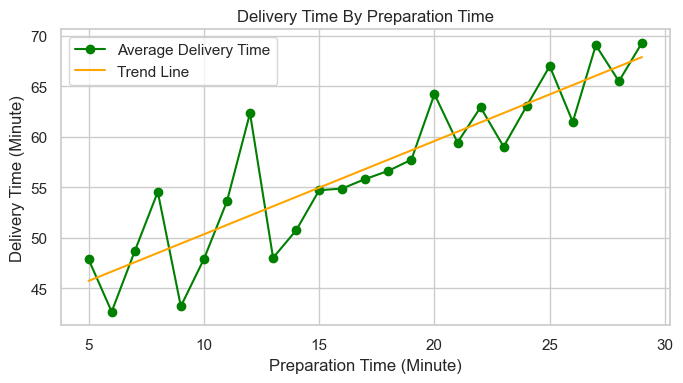

In [42]:
# 1. Line Plot: Delivery Time by Preparation Time (with trendline)
prep_avg = df.groupby('Preparation_Time_min')['Delivery_Time_min'].mean().reset_index()

X = prep_avg[['Preparation_Time_min']]
y = prep_avg['Delivery_Time_min']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(7, 4))
plt.plot(prep_avg['Preparation_Time_min'], prep_avg['Delivery_Time_min'], color='green', marker='o', label='Average Delivery Time')
plt.plot(prep_avg['Preparation_Time_min'], y_pred, color='orange', label='Trend Line')
plt.title("Delivery Time By Preparation Time")
plt.xlabel("Preparation Time (Minute)")
plt.ylabel("Delivery Time (Minute)")
plt.legend()
plt.tight_layout()
plt.show()



### 2. Bar Charts: Delivery Time by Time of Day, Traffic Level, Weather

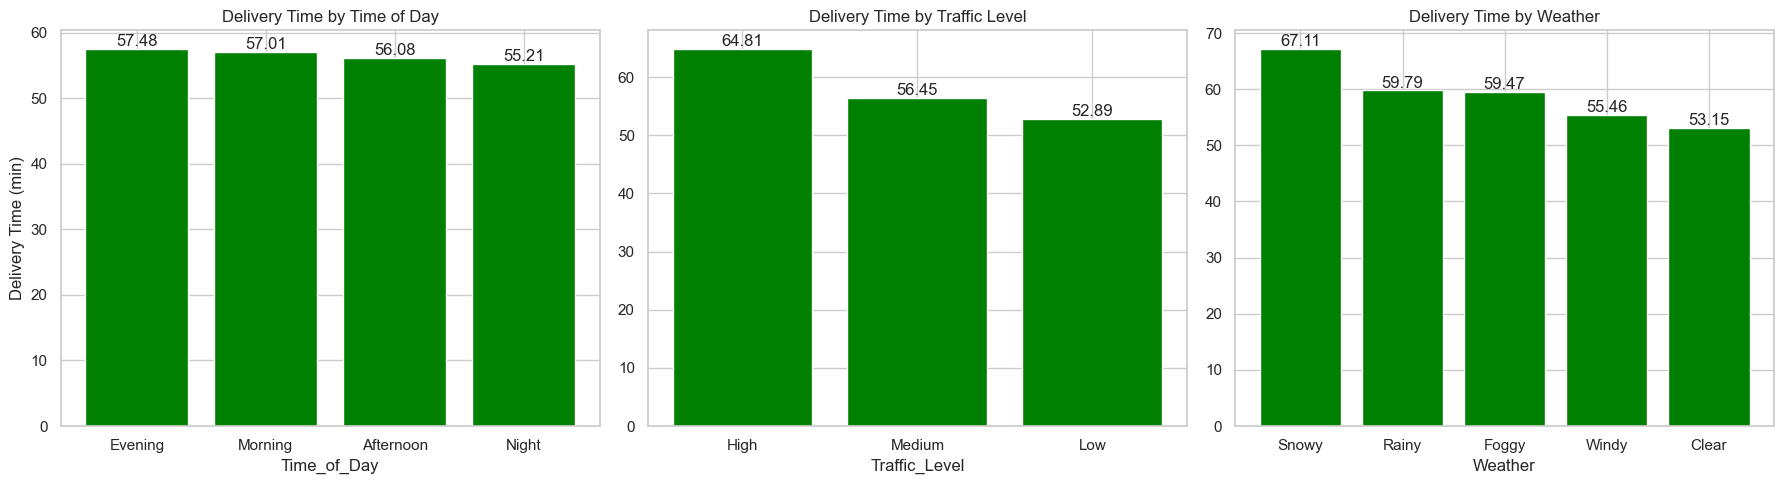

In [43]:
# 2. Bar Charts: Delivery Time by Time of Day, Traffic Level, Weather
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# a. Time of Day
tod_avg = df.groupby('Time_of_Day')['Delivery_Time_min'].mean().sort_values(ascending=False)
axs[0].bar(tod_avg.index, tod_avg.values, color='green')
axs[0].set_title("Delivery Time by Time of Day")
axs[0].set_xlabel("Time_of_Day")
axs[0].set_ylabel("Delivery Time (min)")
for i, v in enumerate(tod_avg.values):
    axs[0].text(i, v + 0.5, f"{v:.2f}", ha='center')

# b. Traffic Level
traffic_avg = df.groupby('Traffic_Level')['Delivery_Time_min'].mean().sort_values(ascending=False)
axs[1].bar(traffic_avg.index, traffic_avg.values, color='green')
axs[1].set_title("Delivery Time by Traffic Level")
axs[1].set_xlabel("Traffic_Level")
for i, v in enumerate(traffic_avg.values):
    axs[1].text(i, v + 0.5, f"{v:.2f}", ha='center')

# c. Weather
weather_avg = df.groupby('Weather')['Delivery_Time_min'].mean().sort_values(ascending=False)
axs[2].bar(weather_avg.index, weather_avg.values, color='green')
axs[2].set_title("Delivery Time by Weather")
axs[2].set_xlabel("Weather")
for i, v in enumerate(weather_avg.values):
    axs[2].text(i, v + 0.5, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


### 🎯 Insight for Objective 3: Identify temporal patterns by examining delivery distribution across different times of day, trafic level, weather, and analyzing preparation time duration.



📌 Key Insights:

1. Delivery Time by Preparation Time
 There is a strong positive linear relationship between preparation time and delivery time. As food preparation time increases, total delivery time tends to rise proportionally. The upward trend line confirms that even small increases in preparation time can lead to meaningful delays in overall service.

2. Delivery Time by Time of Day
 Average delivery durations fluctuate across different times of day. Evening deliveries take the longest (57.48 minutes), followed by morning (57.01), afternoon (56.08), and the shortest during night hours (55.21). These differences, although moderate, suggest peak-hour operational inefficiencies.

3. Delivery Time by Traffic Level
 Deliveries during high-traffic conditions have the longest average delivery time (64.81 minutes), while medium and low-traffic conditions show faster times at 56.45 and 52.89 minutes, respectively. This confirms the significant impact of traffic congestion on delivery performance.

4. Delivery Time by Weather
 Severe weather conditions lead to longer delivery durations. Snowy conditions cause the highest average delay (67.11 minutes), while clear weather results in the fastest deliveries (53.15 minutes). Rainy and foggy conditions also contribute to moderate slowdowns.

💡 Recommendations:

* Consider batching or scheduling food preparation processes during peak hours to reduce preparation bottlenecks and mitigate their impact on total delivery time.

* Use predictive models to adjust estimated delivery windows based on time of day and expected traffic or weather conditions.

* Implement dynamic resource allocation strategies, such as increasing courier availability or optimizing routing, during high-traffic or adverse weather periods.

* Communicate realistic delivery expectations to customers during peak times or poor weather to maintain satisfaction and transparency.



## 4. Explore the relationship between distance and delivery time to uncover operational thresholds or delays associated with longer routes.

### Relationship distance and delivery time

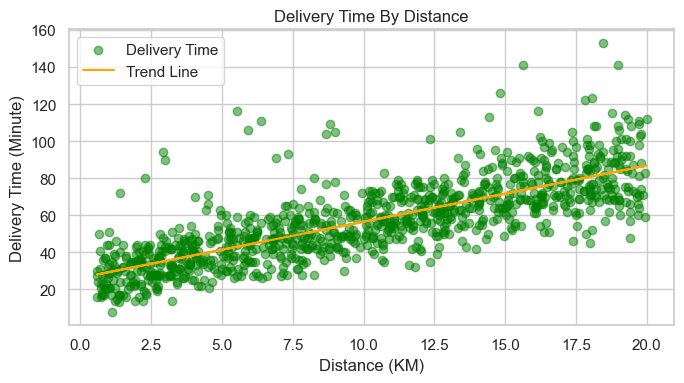

In [44]:
# Scatter plot with trend line: Delivery Time by Distance
plt.figure(figsize=(7, 4))
plt.scatter(df['Distance_km'], df['Delivery_Time_min'], alpha=0.5, color='green', label='Delivery Time')

# Regression Line
X = df[['Distance_km']]
y = df['Delivery_Time_min']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(df['Distance_km'], y_pred, color='orange', label='Trend Line')
plt.title("Delivery Time By Distance")
plt.xlabel("Distance (KM)")
plt.ylabel("Delivery Time (Minute)")
plt.legend()
plt.tight_layout()
plt.show()


### 🎯 Insight for Objective 4: Explore the relationship between distance and delivery time to uncover operational thresholds or delays associated with longer routes.




📌 Key Insight:

1. The visual demonstrates a clear and strong positive linear relationship between delivery distance and delivery time.

2. While most deliveries under 5 km are completed in under 60 minutes, deliveries beyond 15 km show a wider variance and significantly higher delivery durations, some reaching over 150 minutes.

3. The steady upward regression trend confirms that distance is a major predictor of delivery performance, consistent with the previously observed high correlation coefficient (r = 0.78).

💡 Recommendations:

* Introduce dynamic route planning and delivery zoning to prevent long-distance assignments from creating service delays.

* Consider implementing distance-based tiered pricing or scheduling strategies to reflect the additional time and resources required.

* For deliveries beyond 15 km, use predictive buffers or allocate more experienced couriers to ensure timeliness.

* Enhance customer communication for longer-distance deliveries by providing real-time delivery estimates based on geolocation and traffic data.


## 5. Provide a summary of overall delivery performance, including average delivery time, distance, and food preparation time.

### 📌 Key Performance Summary


In [45]:
df.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,10.0600,16.9820,4.5920,56.7320
std,5.6967,7.2046,2.8712,22.0709
min,0.5900,5.0000,0.0000,8.0000
25%,5.1050,11.0000,2.0000,41.0000
50%,10.1900,17.0000,5.0000,55.5000
75%,15.0175,23.0000,7.0000,71.0000
max,19.9900,29.0000,9.0000,153.0000


Based on the aggregated (describe) dataset:

- 🕒 The average delivery time is approximately 56.7 minutes, indicating a moderate total fulfillment duration across all orders.

- 📍 The average delivery distance is around 10.06 kilometers, suggesting a relatively broad service area that spans both short- and medium-range deliveries.

- ⏲️ The average food preparation time is roughly 16.98 minutes, contributing to a significant portion of the overall delivery duration.

These performance indicators highlight that while delivery operations are generally consistent, there is opportunity to reduce overall service time through optimization of preparation and routing processes.

💡 Recommendations:

* Monitor and benchmark preparation time to identify outliers or inefficiencies in kitchen workflows.

* Explore opportunities for micro-fulfillment or localized dispatching strategies to reduce average distance traveled.

* Use these performance baselines to define realistic KPIs and develop targeted interventions, especially during high-traffic periods or adverse weather conditions.


## 6. Enable interactive data exploration through dashboard filters (e.g., traffic, weather, courier experience) to support tailored business insights.

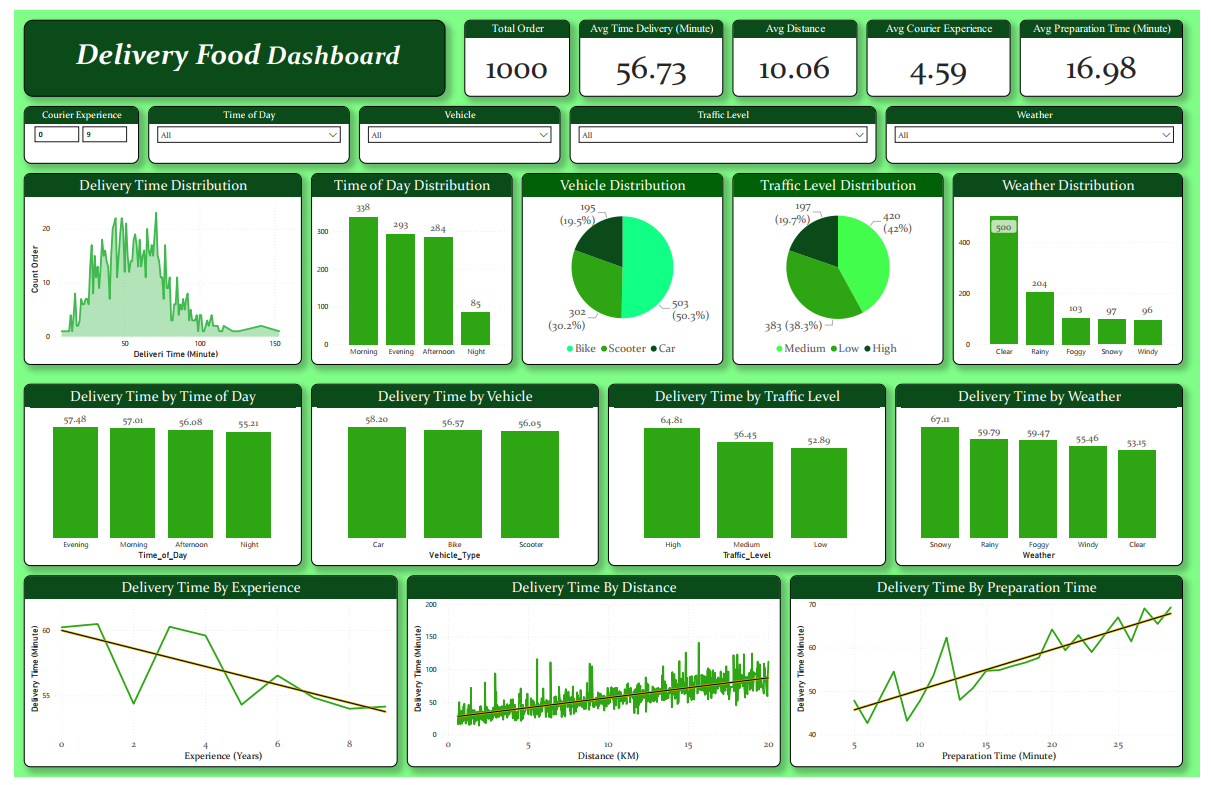

 [Delivery Food Dashboard Power BI](https://drive.google.com/drive/folders/1CPRfo1EM0nnD4_5GlhMtvLSbQkrZ51Uf?usp=sharing)

# Modeling 

Objective 1 (Build predictive models using supervised learning techniques (e.g., regression, ensemble models) to estimate delivery time based on known variables.)

## Import Library For Modeling

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

## Categorizing Column Types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [18]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [19]:
# drop 'Order_ID' as it is not useful for prediction
df.drop(columns=['Order_ID'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [21]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [22]:
# Identify the target variable
target_column = 'Delivery_Time_min'

# 1. Numerical features (excluding the target)
# These are continuous or discrete numerical variables
numerical_features = [
    'Distance_km', 
    'Preparation_Time_min',
    'Courier_Experience_yrs'
]

# 2. Binary categorical features
# These have only two unique values (e.g., Yes/No, True/False)
# Note: There are no binary features in this dataset, all categorical features have more than two unique values
categorical_binary = []  

# 3. Multiclass categorical features
# These have more than two unique values
categorical_multiclass = [
    'Weather', 
    'Traffic_Level',
    'Time_of_Day',
    'Vehicle_Type'
]

# Print the results for verification
print("🎯 Target Variable:", target_column)
print("\n🔢 Numerical Features:\n", numerical_features)
print("\n🟪 Binary Categorical Features:\n", categorical_binary)
print("\n🟦 Multiclass Categorical Features:\n", categorical_multiclass)

🎯 Target Variable: Delivery_Time_min

🔢 Numerical Features:
 ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

🟪 Binary Categorical Features:
 []

🟦 Multiclass Categorical Features:
 ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


## Split Dataset

In [23]:
# Split dataset into features and target variable (train-test split)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=[target_column]),  # Features (all columns except target)
    df[target_column],                # Target variable
    test_size=0.2,
    random_state=11,
    # Remove stratify for continuous target variable
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target mean - Train: {y_train.mean():.2f}, Test: {y_test.mean():.2f}")

Training set shape: (800, 7)
Test set shape: (200, 7)
Target mean - Train: 57.12, Test: 55.20


### Check Spliting Data

In [24]:
X_train.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
832,10.29,Foggy,Medium,Evening,Scooter,25,4.0
797,12.33,Clear,High,Night,Bike,7,2.0
49,7.57,Clear,Low,Morning,Bike,21,0.0
867,7.59,Clear,Medium,Afternoon,Scooter,16,3.0
514,19.12,Windy,High,Evening,Car,8,0.0


In [25]:
y_train.head()

832     67
797    101
49      56
867     37
514     92
Name: Delivery_Time_min, dtype: int64

In [26]:
X_test.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
25,14.59,Clear,Medium,Morning,Bike,15,6.0
464,19.81,Clear,Low,Afternoon,Bike,27,1.0
372,19.27,Foggy,High,Afternoon,Bike,14,6.0
730,8.85,Clear,Low,Afternoon,Bike,11,9.0
757,7.04,Clear,Low,Afternoon,Bike,11,8.0


In [27]:
y_test.head()

25     64
464    74
372    92
730    45
757    38
Name: Delivery_Time_min, dtype: int64

## Transformation Data Before Modeling

### Encode and Scaling

#### Encode,scaling and Save Transformation

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Tambahkan OneHotEncoder di sini
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_multiclass)
])

# Fit ONLY on training data
preprocessor.fit(X_train)

# Transform both sets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

#### Check transformation result

In [29]:
print("✅ Shape Training:", X_train_processed.shape)
print("🔢 Scaling Numerical Example:")
print(X_train_processed[:3, :3])  

print("\n🔠 Encode Categorical Exemple:")
print(X_train_processed[:3, -5:])  

✅ Shape Training: (800, 18)
🔢 Scaling Numerical Example:
[[ 0.03506516  1.13248243 -0.18274209]
 [ 0.39223867 -1.35459199 -0.88559629]
 [-0.44116619  0.57979922 -1.58845049]]

🔠 Encode Categorical Exemple:
[[0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]]


## Modeling No Tuning vs Tuning

### Linear Regression

#### No Tuning

In [30]:
# 1. Linear Regression (Default) 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def calculate_regression_metrics(y_true, y_pred):
    """Standard metric calculation for all regression models"""
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': np.mean(np.abs((y_true - y_pred) / np.maximum(1e-10, y_true))) * 100,
        'R2': r2_score(y_true, y_pred)
    }

# Initialize model
model_lr_default = LinearRegression()  

# Training
model_lr_default.fit(X_train_processed, y_train)

# Predictions
pred_train_lr_default = model_lr_default.predict(X_train_processed) 
pred_test_lr_default = model_lr_default.predict(X_test_processed)

# Store results
results_lr_default = {  
    'model': model_lr_default,
    'params': model_lr_default.get_params(),  
    'predictions': {
        'train': pred_train_lr_default,
        'test': pred_test_lr_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_lr_default),
        'test': calculate_regression_metrics(y_test, pred_test_lr_default)
    },
    'metadata': {
        'model_type': 'Linear Regression',
        'version': 'default'
    }
}

# Display metrics
print("🔵 LINEAR REGRESSION (DEFAULT) RESULTS")
metrics_lr_default = pd.DataFrame(results_lr_default['metrics']).round(4)
print(metrics_lr_default)

🔵 LINEAR REGRESSION (DEFAULT) RESULTS
        train     test
MAE    6.6446   5.9669
RMSE  10.8812   8.6664
MAPE  11.0226  10.5447
R2     0.7631   0.8257


#### With Tuning

In [31]:
# 2. Ridge Regression (Tuned) 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Parameter grid untuk tuning
ridge_tune_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Initialize base model
model_ridge_base = Ridge(random_state=42)  

# Grid Search setup
grid_ridge_v1 = GridSearchCV(
    estimator=model_ridge_base,
    param_grid=ridge_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_ridge_v1.fit(X_train_processed, y_train)

# Get best model
model_ridge_tuned = grid_ridge_v1.best_estimator_  

# Predictions
pred_train_ridge_tuned = model_ridge_tuned.predict(X_train_processed)  
pred_test_ridge_tuned = model_ridge_tuned.predict(X_test_processed)

# Store results
results_ridge_tuned = {  
    'model': model_ridge_tuned,
    'grid_search': grid_ridge_v1,
    'best_params': grid_ridge_v1.best_params_,
    'params': model_ridge_tuned.get_params(),
    'predictions': {
        'train': pred_train_ridge_tuned,
        'test': pred_test_ridge_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_ridge_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_ridge_tuned)
    },
    'metadata': {
        'model_type': 'Ridge Regression',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("🔵 RIDGE REGRESSION (TUNED) RESULTS")
print("🎯 Best Parameters:", results_ridge_tuned['best_params'])
print("\n📊 Performance Metrics:")
metrics_ridge_tuned = pd.DataFrame(results_ridge_tuned['metrics']).round(4)
print(metrics_ridge_tuned)




Fitting 5 folds for each of 48 candidates, totalling 240 fits
🔵 RIDGE REGRESSION (TUNED) RESULTS
🎯 Best Parameters: {'alpha': 10, 'fit_intercept': True, 'solver': 'lsqr'}

📊 Performance Metrics:
        train     test
MAE    6.6663   5.9381
RMSE  10.8887   8.6038
MAPE  11.1777  10.6339
R2     0.7628   0.8282


### Random Forest

#### No Tuning

In [32]:
# 3. Random Forest (Default) 
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize model
model_rf_default = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Training
model_rf_default.fit(X_train_processed, y_train)

# Predictions
pred_train_rf_default = model_rf_default.predict(X_train_processed)
pred_test_rf_default = model_rf_default.predict(X_test_processed)

# Store results (minimalis)
results_rf_default = {
    'model': model_rf_default,
    'params': model_rf_default.get_params(),  
    'predictions': {
        'train': pred_train_rf_default,
        'test': pred_test_rf_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_rf_default),
        'test': calculate_regression_metrics(y_test, pred_test_rf_default)
    },
    'metadata': {
        'model_type': 'Random Forest',
        'version': 'default'
    }
}

# Display metrics
print("🌲 RANDOM FOREST (DEFAULT) RESULTS")
print(pd.DataFrame(results_rf_default['metrics']).round(4))


🌲 RANDOM FOREST (DEFAULT) RESULTS
       train     test
MAE   2.9993   6.9202
RMSE  4.6453   9.5502
MAPE  5.2314  13.6306
R2    0.9568   0.7883


#### With Tuning

In [33]:
# 4. Random Forest (Tuned) - STANDARD VERSION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd

# Parameter distributions
rf_tune_params = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize base model
model_rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Randomized Search
search_rf_tuned = RandomizedSearchCV(
    estimator=model_rf_base,
    param_distributions=rf_tune_params,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit model
search_rf_tuned.fit(X_train_processed, y_train)

# Get best model
model_rf_tuned = search_rf_tuned.best_estimator_

# Generate predictions
pred_train_rf_tuned = model_rf_tuned.predict(X_train_processed)
pred_test_rf_tuned = model_rf_tuned.predict(X_test_processed)

# Store results
results_rf_tuned = {
    'model': model_rf_tuned,
    'search': search_rf_tuned,
    'best_params': search_rf_tuned.best_params_,
    'params': model_rf_tuned.get_params(),
    'predictions': {
        'train': pred_train_rf_tuned,
        'test': pred_test_rf_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_rf_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_rf_tuned)
    },
    'metadata': {
        'model_type': 'Random Forest',
        'version': 'tuned_v1',
        'tuning_method': 'RandomizedSearchCV'
    }
}

# Display results
print("🌲 RANDOM FOREST (TUNED) RESULTS")
print("🎯 Best Parameters:", results_rf_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_rf_tuned['metrics']).round(4))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
🌲 RANDOM FOREST (TUNED) RESULTS
🎯 Best Parameters: {'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 154}

📊 Performance Metrics:
       train     test
MAE   5.5753   6.6935
RMSE  8.8247   9.2926
MAPE  9.7675  13.2181
R2    0.8442   0.7996


### XGBoost

#### No Tuning

In [34]:
# 5. XGBoost (Default) 
from xgboost import XGBRegressor
import pandas as pd

# Initialize model
model_xgb_default = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse',
    verbosity=0
)  

# Training
model_xgb_default.fit(X_train_processed, y_train)

# Predictions
pred_train_xgb_default = model_xgb_default.predict(X_train_processed)  
pred_test_xgb_default = model_xgb_default.predict(X_test_processed)

# Store results
results_xgb_default = {  
    'model': model_xgb_default,
    'params': model_xgb_default.get_params(),
    'predictions': {
        'train': pred_train_xgb_default,
        'test': pred_test_xgb_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_xgb_default),
        'test': calculate_regression_metrics(y_test, pred_test_xgb_default)
    },
    'metadata': {
        'model_type': 'XGBoost',
        'version': 'default',
        'note': 'Default hyperparameters'
    }
}

# Display metrics
print("⚡ XGBOOST (DEFAULT) RESULTS")
metrics_xgb_default = pd.DataFrame(results_xgb_default['metrics']).round(4)
print(metrics_xgb_default)




⚡ XGBOOST (DEFAULT) RESULTS
       train     test
MAE   0.4375   7.9239
RMSE  0.6321  11.0708
MAPE  0.8772  15.0084
R2    0.9992   0.7156


#### With Tuning

In [35]:
# 6. XGBoost (Tuned) - STANDARD VERSION
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid
xgb_tune_params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize base model
model_xgb_base = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse',
    verbosity=0
)

# Grid Search setup
search_xgb_tuned = GridSearchCV(
    estimator=model_xgb_base,
    param_grid=xgb_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit model
search_xgb_tuned.fit(X_train_processed, y_train)

# Get best model
model_xgb_tuned = search_xgb_tuned.best_estimator_

# Generate predictions
pred_train_xgb_tuned = model_xgb_tuned.predict(X_train_processed)
pred_test_xgb_tuned = model_xgb_tuned.predict(X_test_processed)

# Store results
results_xgb_tuned = {
    'model': model_xgb_tuned,
    'search': search_xgb_tuned,
    'best_params': search_xgb_tuned.best_params_,
    'params': model_xgb_tuned.get_params(),
    'predictions': {
        'train': pred_train_xgb_tuned,
        'test': pred_test_xgb_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_xgb_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_xgb_tuned)
    },
    'metadata': {
        'model_type': 'XGBoost',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("⚡ XGBOOST (TUNED) RESULTS")
print("🎯 Best Parameters:", results_xgb_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_xgb_tuned['metrics']).round(4))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
⚡ XGBOOST (TUNED) RESULTS
🎯 Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

📊 Performance Metrics:
       train     test
MAE   5.6725   6.4066
RMSE  8.8010   9.2271
MAPE  9.6377  11.5304
R2    0.8450   0.8024


# Model Comparison

Objective 2. Compare and evaluate different ML algorithms to select the most accurate and interpretable model.

In [36]:
# MODEL COMPARISON TABLE 
import pandas as pd

# Dictionary of all trained models
all_models = {
    '1. Linear Regression (Default)': results_lr_default,
    '2. Ridge Regression (Tuned)': results_ridge_tuned,
    '3. Random Forest (Default)': results_rf_default,
    '4. Random Forest (Tuned)': results_rf_tuned,
    '5. XGBoost (Default)': results_xgb_default,
    '6. XGBoost (Tuned)': results_xgb_tuned
}

def get_metrics_summary(model_name, model_results):
    """Extracts comprehensive metrics including MAPE"""
    return {
        'Model': model_name,
        'MAE (Train)': model_results['metrics']['train']['MAE'],
        'RMSE (Train)': model_results['metrics']['train']['RMSE'],
        'MAPE (Train) %': model_results['metrics']['train']['MAPE'],
        'R² (Train)': model_results['metrics']['train']['R2'],
        'MAE (Test)': model_results['metrics']['test']['MAE'],
        'RMSE (Test)': model_results['metrics']['test']['RMSE'], 
        'MAPE (Test) %': model_results['metrics']['test']['MAPE'],
        'R² (Test)': model_results['metrics']['test']['R2'],
        'Parameters': str(model_results.get('best_params', 'Default'))[:50] + '...'
    }

# Create summary dataframe
summary_df = pd.DataFrame([get_metrics_summary(name, model) for name, model in all_models.items()]).set_index('Model')

# Display settings
pd.set_option('display.max_colwidth', 35)
pd.set_option('display.precision', 4)

print("MODEL PERFORMANCE COMPARISON")
display(summary_df)

# Show tuning details
print("\nBEST HYPERPARAMETERS FOR TUNED MODELS:")
for name in ['2. Ridge Regression (Tuned)', '4. Random Forest (Tuned)', '6. XGBoost (Tuned)']:
    print(f"\n{name}:")
    print(all_models[name]['best_params'])

MODEL PERFORMANCE COMPARISON


,MAE (Train),RMSE (Train),MAPE (Train) %,R² (Train),MAE (Test),RMSE (Test),MAPE (Test) %,R² (Test),Parameters
Model,,,,,,,,,
1. Linear Regression (Default),6.6446,10.8812,11.0226,0.7631,5.9669,8.6664,10.5447,0.8257,Default...
2. Ridge Regression (Tuned),6.6663,10.8887,11.1777,0.7628,5.9381,8.6038,10.6339,0.8282,"{'alpha': 10, 'fit_intercept': ..."
3. Random Forest (Default),2.9993,4.6453,5.2314,0.9568,6.9202,9.5502,13.6306,0.7883,Default...
4. Random Forest (Tuned),5.5753,8.8247,9.7675,0.8442,6.6935,9.2926,13.2181,0.7996,"{'bootstrap': True, 'max_depth'..."
5. XGBoost (Default),0.4375,0.6321,0.8772,0.9992,7.9239,11.0708,15.0084,0.7156,Default...
6. XGBoost (Tuned),5.6725,8.8010,9.6377,0.8450,6.4066,9.2271,11.5304,0.8024,"{'colsample_bytree': 0.8, 'gamm..."



BEST HYPERPARAMETERS FOR TUNED MODELS:

2. Ridge Regression (Tuned):
{'alpha': 10, 'fit_intercept': True, 'solver': 'lsqr'}

4. Random Forest (Tuned):
{'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 154}

6. XGBoost (Tuned):
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


### Key Insight from summary
🔍Best Model Evaluation Summary: Ridge Regression (Tuned) & Random Forest (Tuned)

Based on the model evaluation table, the following are the two best-performing models along with the rationale behind their selection:

---

1. Ridge Regression (Tuned)

- Reason: This model demonstrates the most stable and balanced performance between training and testing datasets.

 • Best Test Performance: It achieved the lowest RMSE on the test set (8.6038) and the highest R² score (0.8282) among all models. This indicates that Ridge Regression (Tuned) is the most capable in explaining the variability in unseen data.

 • Strong Generalization: The gap between training and test performance is relatively small. The MAE for the training set is 6.6663, while the MAE for the test set is 5.9381. Likewise, RMSE (Train) is 10.8887 and RMSE (Test) is 8.6038 — suggesting the model generalizes well and does not overfit.

 • Competitive MAPE: The model also yields one of the lowest MAPE values on the test set (10.6339), indicating strong predictive accuracy in percentage terms.

---

2. Random Forest (Tuned)

- Reason: This model also shows consistently good performance, although slightly below Ridge Regression (Tuned) in terms of R² on the test set.

 • Improved Generalization: After hyperparameter tuning, the model significantly reduced overfitting observed in the default version. The MAE is 5.5753 (Train) vs. 6.6935 (Test), and R² scores are 0.8442 (Train) vs. 0.7996 (Test), with an acceptable performance gap.

 • Reliable RMSE and R²: The model achieved a competitive RMSE of 9.2926 and R² of 0.7996 on the test set, making it the second-best performer after Ridge Regression (Tuned).

 • Balanced Trade-Off: Random Forest (Tuned) offers a well-balanced compromise between model complexity and generalization ability, making it a dependable choice for this regression task.

---

📌 Final Conclusion:

Although models like XGBoost (Default) and Random Forest (Default) show extremely high performance on the training set (R² = 0.9992 and 0.9568, respectively), their test performance drops significantly (R² = 0.7156 and 0.7883), indicating clear signs of overfitting. In contrast, Ridge Regression (Tuned) and Random Forest (Tuned) maintain a strong balance between training and test results, making them more robust for generalization on new data. Considering the highest R² on the test set, Ridge Regression (Tuned) stands out as the overall best-performing model.

# Feature Breakdown

For Objective 3. Support data-driven decision making by identifying the most influential features affecting delivery time, enabling businesses to optimize operations accordingly.

🔝 Top 10 Most Influential Features:
                   feature  coefficient  abs_coef
0              Distance_km      17.1057   17.1057
1     Preparation_Time_min       6.7590    6.7590
8       Traffic_Level_High       5.7608    5.7608
9        Traffic_Level_Low      -5.4923    5.4923
3            Weather_Clear      -4.8887    4.8887
6            Weather_Snowy       4.1610    4.1610
4            Weather_Foggy       3.2684    3.2684
7            Weather_Windy      -2.5902    2.5902
2   Courier_Experience_yrs      -2.0336    2.0336
12     Time_of_Day_Evening       0.8933    0.8933


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5000\1866689376.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coef_df.head(20), palette='viridis')


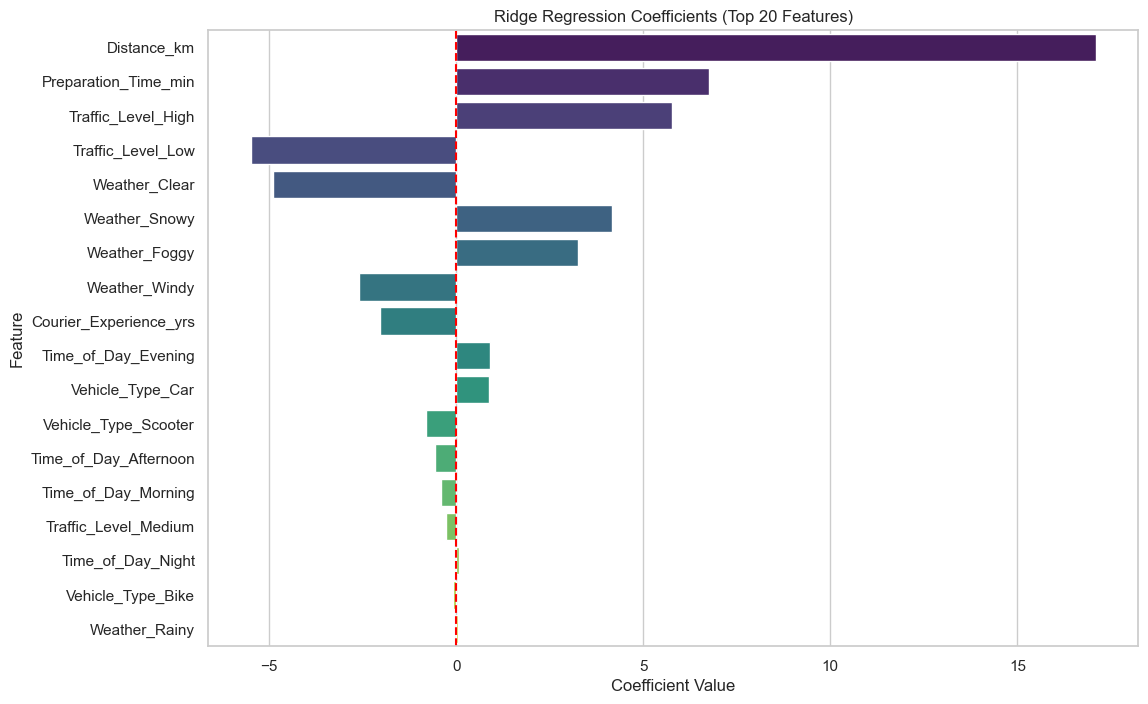

In [37]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. GET FEATURE NAMES AFTER PREPROCESSING
# a. Numerical features (already scaled)
numeric_feature_names = numerical_features  # ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

# b. Categorical features (from one-hot encoding)
categorical_encoder = preprocessor.named_transformers_['cat']['onehot']
categorical_feature_names = categorical_encoder.get_feature_names_out(categorical_multiclass)

# c. Combine all feature names
all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# 2. GET RIDGE MODEL COEFFICIENTS
ridge_coef = model_ridge_tuned.coef_  # Extract coefficients from trained Ridge model

# 3. CREATE ANALYSIS DATAFRAME
coef_df = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': ridge_coef,
    'abs_coef': np.abs(ridge_coef)  # Absolute value for magnitude comparison
}).sort_values('abs_coef', ascending=False)

# 4. DISPLAY TOP 10 MOST INFLUENTIAL FEATURES
print("🔝 Top 10 Most Influential Features:")
print(coef_df.head(10))

# 5. VISUALIZATION
plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=coef_df.head(20), palette='viridis')
plt.title('Ridge Regression Coefficients (Top 20 Features)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='red', linestyle='--')  # Zero line reference
plt.show()

### Key Insight and Final Recomendation


📌 Key Insights:

1. Distance\_km is by far the most influential feature, with a coefficient of 17.11. This suggests that for every additional kilometer, the delivery time increases by approximately 17 minutes, holding other variables constant. This highlights distance as a primary driver of total delivery duration.

2. Preparation\_Time\_min ranks second with a positive coefficient (6.76), reinforcing earlier insights that longer food preparation directly adds to total delivery time.

3. Traffic\_Level\_High (coef: +5.76) significantly increases delivery time, while Traffic\_Level\_Low (coef: –5.49) helps reduce it. This reflects how traffic congestion disrupts operational efficiency.

4. Weather conditions show mixed effects. Snowy and Foggy weather increase delivery time (coef: +4.16 and +3.26), while Clear weather reduces it (coef: –4.89). Windy weather also contributes to moderate delays.

5. Courier\_Experience\_yrs has a negative coefficient (–2.03), indicating that more experienced couriers tend to deliver faster.

6. Time\_of\_Day\_Evening slightly increases delivery time (coef: +0.89), aligning with previous findings that evening deliveries are less efficient.

---

💡 Recommendations:

* Prioritize intelligent route optimization and distance-aware dispatch systems to mitigate the dominant impact of delivery distance.

* Streamline kitchen operations to reduce food preparation time, which is the second-highest driver of delay.

* Implement traffic-aware delivery scheduling by assigning flexible delivery windows or rerouting during high-traffic periods.

* Monitor weather forecasts and prepare contingency plans for extreme conditions (especially snow or fog) through buffer times or surge staffing.

* Assign complex or time-sensitive orders to experienced couriers to leverage their efficiency and reliability.

* Consider adapting pricing, ETAs, or staffing during evening hours when delivery time tends to rise.




# Deployment Model

For Objective 4. Deploy a simulation-ready prediction system that could be integrated into streamlit for real-time estimation or route optimization.


Menggunakan bahasa indonesia untuk belajar

In [38]:
import joblib
import os
from datetime import datetime

# 1. Buat direktori 'model' jika belum ada
os.makedirs('model', exist_ok=True)

# 2. Simpan Model Ridge Regression
joblib.dump(model_ridge_tuned, 'model/ridge_model.joblib')

# 3. Simpan Preprocessor
joblib.dump(preprocessor, 'model/preprocessor.joblib')

# 4. Simpan Metadata Model (Opsional)
model_metadata = {
    'model_type': 'Ridge Regression',
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'features': {
        'numerical': numerical_features,
        'categorical': categorical_multiclass
    },
    'best_params': model_ridge_tuned.get_params()
}

joblib.dump(model_metadata, 'model/model_metadata.joblib')

# 5. Verifikasi penyimpanan
print("✅ Model & Preprocessor Tersimpan di:")
print(f"- Model: model/ridge_model.joblib")
print(f"- Preprocessor: model/preprocessor.joblib")
print(f"- Metadata: model/model_metadata.joblib")

✅ Model & Preprocessor Tersimpan di:
- Model: model/ridge_model.joblib
- Preprocessor: model/preprocessor.joblib
- Metadata: model/model_metadata.joblib


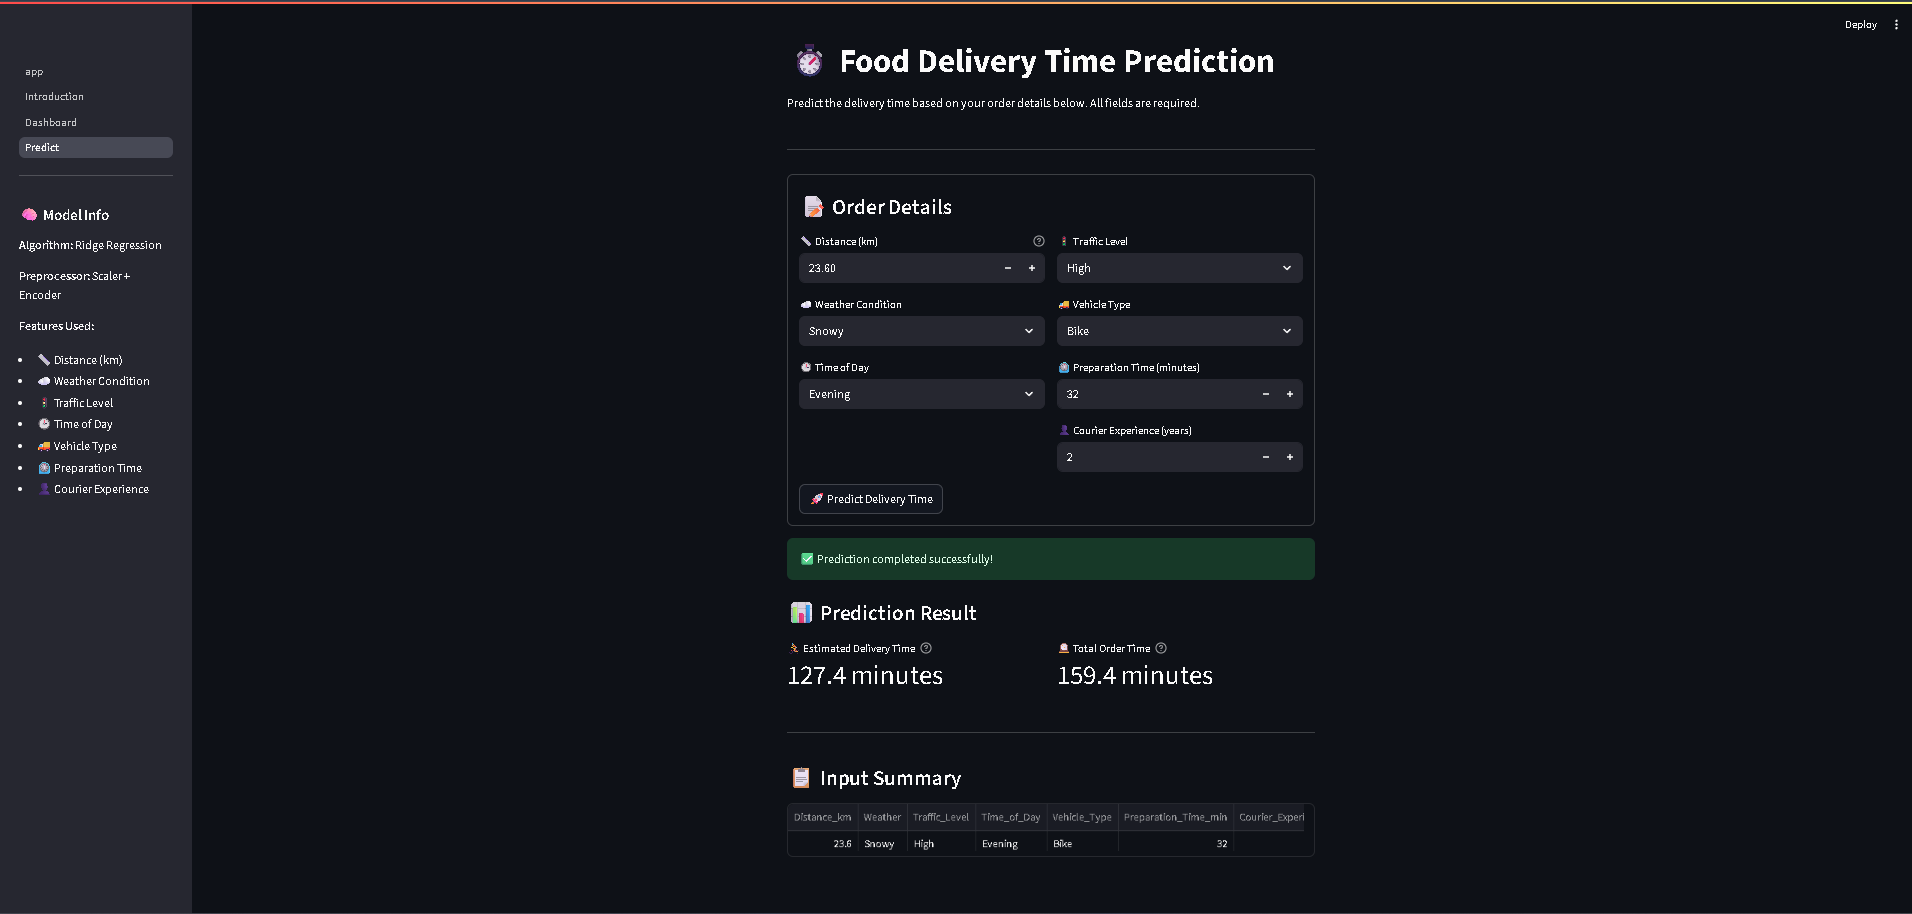